In [8]:
import numpy as np
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)
maxlen=500
train_data=pad_sequences(train_data,maxlen=maxlen)
test_data=pad_sequences(test_data,maxlen=maxlen)
num_classes=len(set(train_labels))
train_labels=to_categorical(train_labels,num_classes)
test_labels=to_categorical(test_labels,num_classes)

model=Sequential()
model.add(Embedding(10000,128,input_length=maxlen))
model.add(LSTM(128))
model.add(Dense(num_classes,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_data,train_labels,epochs=10,batch_size=128,validation_split=0.2)
test_loss,test_acc=model.evaluate(test_data,test_labels)
print("Test accuracy:",test_acc)


Epoch 1/10


57/57 [==============================] - 46s 768ms/step - loss: 2.6880 - accuracy: 0.3390 - val_loss: 2.3785 - val_accuracy: 0.3450
Epoch 2/10
57/57 [==============================] - 43s 751ms/step - loss: 2.0952 - accuracy: 0.4491 - val_loss: 1.9091 - val_accuracy: 0.4997
Epoch 3/10
57/57 [==============================] - 43s 763ms/step - loss: 1.8050 - accuracy: 0.5305 - val_loss: 1.7747 - val_accuracy: 0.5342
Epoch 4/10
57/57 [==============================] - 43s 761ms/step - loss: 1.6505 - accuracy: 0.5612 - val_loss: 1.6605 - val_accuracy: 0.5687
Epoch 5/10
57/57 [==============================] - 43s 756ms/step - loss: 1.5123 - accuracy: 0.6077 - val_loss: 1.5960 - val_accuracy: 0.5932
Epoch 6/10
57/57 [==============================] - 43s 756ms/step - loss: 1.4084 - accuracy: 0.6259 - val_loss: 1.6499 - val_accuracy: 0.5793
Epoch 7/10
57/57 [==============================] - 43s 760ms/step - loss: 1.2970 - accuracy: 0.6632 - val_loss: 1.5496 - val_accuracy: 0.62

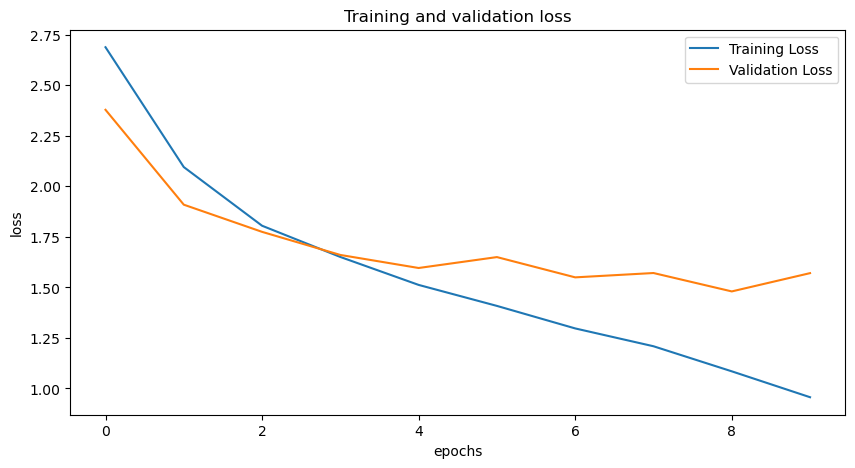

In [15]:
import matplotlib.pyplot as plt
train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.figure(figsize=(10,5))
plt.plot(train_loss,label='Training Loss')
plt.plot(val_loss,label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


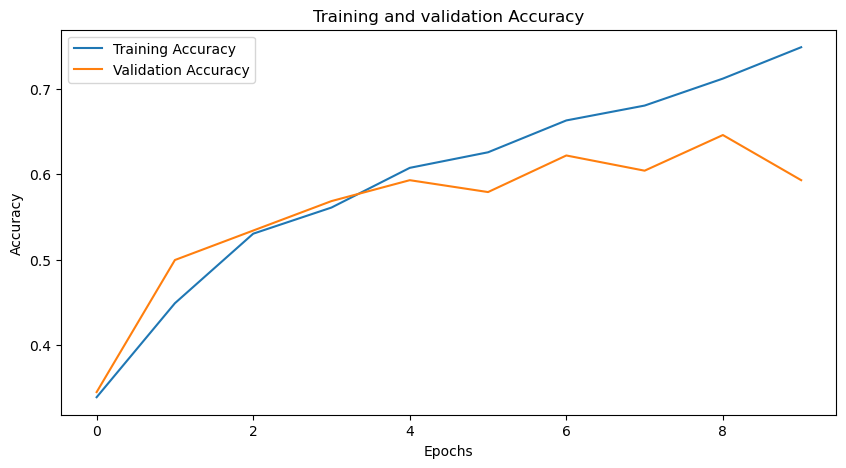

In [16]:
plt.figure(figsize=(10,5))
plt.plot(train_acc,label="Training Accuracy")
plt.plot(val_acc,label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.legend()
plt.show()

71/71 [==============================] - 7s 89ms/step


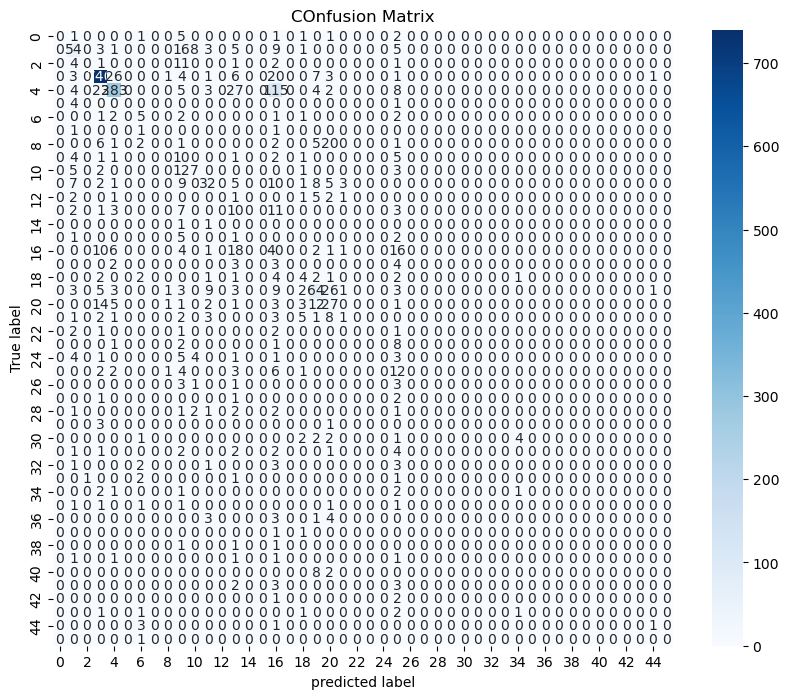

In [17]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
pred_probs=model.predict(test_data)
pred_labels=np.argmax(pred_probs,axis=1)
test_labels=np.argmax(test_labels,axis=1)
conmat=confusion_matrix(test_labels,pred_labels)
plt.figure(figsize=(10,8))
sns.heatmap(conmat,annot=True,fmt='d',cmap='Blues')
plt.title('COnfusion Matrix')
plt.xlabel('predicted label')
plt.ylabel('True label')
plt.show()